<a href="https://colab.research.google.com/github/prav87654/Clustering-Model--Netflix-TV-shows-and-Movies/blob/main/Clustering_Model__Praveen_S.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**CAPSTONE PROJECT 4**

## **Netflix Movies and TVshows Clustering Model**

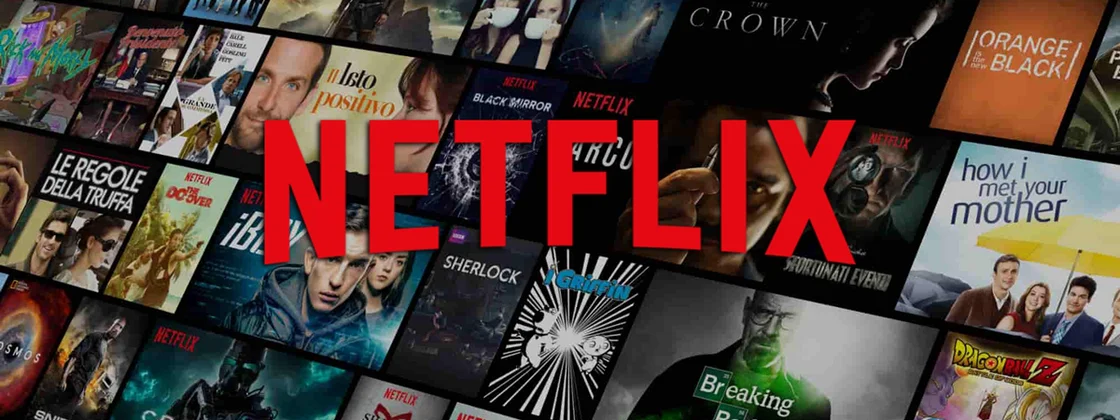

###Netflix, Inc. is an American subscription streaming service and production company. Launched on August 29, 1997, it offers a film and television series library through distribution deals as well as its own productions, known as Netflix Originals.As of March 31, 2022, Netflix had over 221.6 million subscribers worldwide.
###Our clustering model can help us understand what number of and type of contents available in this streaming platform and its success behind by identifying the number of clusters of contents on the basis of its parameters.


##**Problem Statement**
###This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine. In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

##This dataset consists of about **7500+** records and **12** attributes

###1.**show_id** : Unique ID for every Movie / Tv Show
###2.**type :** Identifier - A Movie or TV Show
###3.**title :** Title of the Movie / Tv Show
###4.**director :** Director of the Movie
###5.**cast :** Actors involved in the movie / show
###6.**country :** Country where the movie / show was produced
###7.**date_added :** Date it was added on Netflix
###8.**release_year :** Actual Releaseyear of the movie / show
###9.**rating :** TV Rating of the movie / show
###10.**duration :** Total Duration - in minutes or number of seasons
###11.**listed_in :** Genere
###12.**description:** The Summary description 


##**Loading the dataset and Importing Modules**

In [ ]:
# Importing modules
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import math

import warnings

In [ ]:
# Mounting google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Loading the dataset
netflix_df=pd.read_csv('/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING (1).csv')

In [ ]:
# Printing the first 5 rows
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
# Printing the last 5 rows
netflix_df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [ ]:
# Checking the shape of the dataset
netflix_df.shape

(7787, 12)

In [ ]:
# Checking the basic information of the dataset
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [ ]:
# Statistical Description of the Dataset
netflix_df.describe(include='all').transpose() 

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
show_id,7787,7787,s1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,7787,2,Movie,5377,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,7787,7787,3%,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,5398,4049,"Raúl Campos, Jan Suter",18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,7069,6831,David Attenborough,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,7280,681,United States,2555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,7777,1565,"January 1, 2020",118,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,7787.0,NaN,NaN,NaN,2013.93258,8.757395,1925.0,2013.0,2017.0,2018.0,2021.0
rating,7780,14,TV-MA,2863,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,7787,216,1 Season,1608,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##**Exploratory Data Analysis**

In [ ]:
#No. of missing values in each attribute
netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [ ]:
#total percentage of missing data
missing_data = netflix_df.isnull().sum()
total_percentage = (missing_data.sum()/netflix_df.shape[0]) * 100
print(f'The total percentage of missing data is {round(total_percentage,2)}%')

The total percentage of missing data is 46.63%


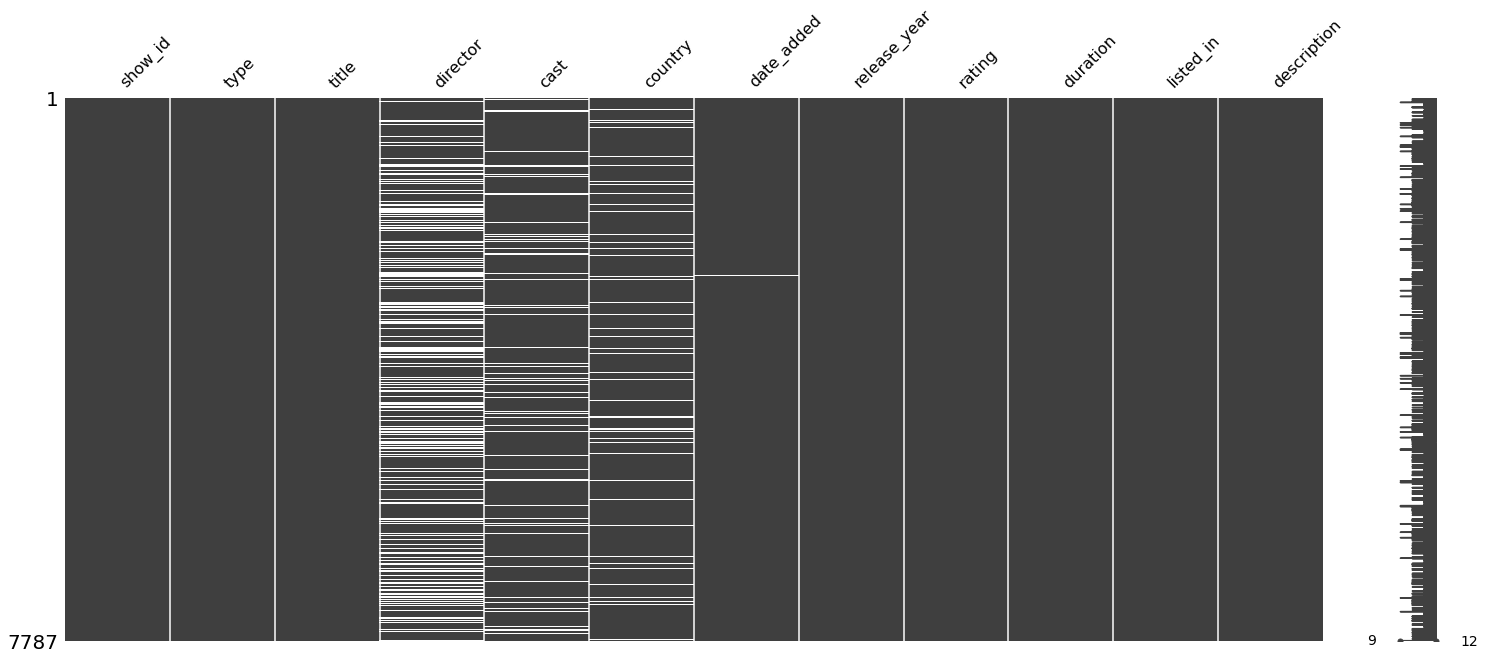

In [ ]:
# Visualizing the distribution of  missing values in the dataset
import missingno as msno
# Visualize missing values as a matrix
msno.matrix(netflix_df)

In [ ]:
#Total no. of missing values
netflix_df.isnull().sum().sum()

3631

In [ ]:
#Replacing data in each null values and dropping colums
netflix_df.director.fillna("No Director", inplace=True)
netflix_df.cast.fillna("No Cast", inplace=True)
netflix_df.country.fillna("Country Unavailable", inplace=True)
netflix_df.dropna(subset=["date_added", "rating"], inplace=True)

In [ ]:
#Checking for null values
netflix_df.isnull().any()

show_id         False
type            False
title           False
director        False
cast            False
country         False
date_added      False
release_year    False
rating          False
duration        False
listed_in       False
description     False
dtype: bool

In [ ]:
# defining a function to get the year addedfrom the date_added
def func(x):
  return x.split()[0]

In [ ]:
#Creating a year_added colum by stripping the date
netflix_df['month_added'] = netflix_df['date_added'].apply(func)
netflix_df['year_added']  = netflix_df['date_added'].apply(lambda x : x.split()[-1])
netflix_df['release_year']  = netflix_df['release_year'].astype(str)
netflix_df =netflix_df.drop('date_added', axis =1)

In [ ]:
netflix_df.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,month_added,year_added
0,s1,TV Show,3%,No Director,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,August,2020
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,December,2016
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",December,2018
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",November,2017
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,January,2020


##**Data Visualization**

In [ ]:
# defining two sub-datasets based on type of the content
TVshows_df = netflix_df[netflix_df['type'] == 'TV Show']
Movie_df  = netflix_df[netflix_df['type']== 'Movie']

In [ ]:
# creating a column n movie_df dataframe using func_1 funtion
Movie_df['duration'] = Movie_df['duration'].apply(func)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#First five rows of Movie_data
Movie_df.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,month_added,year_added
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,December,2016
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",December,2018
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",November,2017
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123,Dramas,A brilliant group of students become card-coun...,January,2020
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,2019,TV-MA,95,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",June,2020


In [ ]:
Movie_df.shape

(5372, 13)

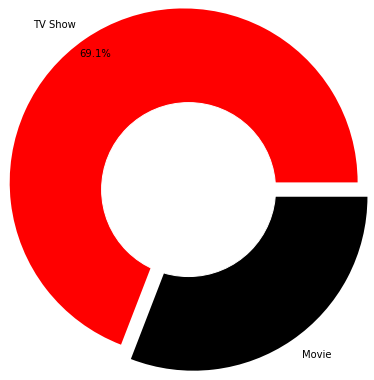

Movie      5372
TV Show    2398
Name: type, dtype: int64


In [ ]:
#Plotting a donut plot for type
values=netflix_df['type'].value_counts()
labels=netflix_df['type'].unique().tolist()

#Defining the attributes of the donut plot
plt.pie(values,labels=labels,radius=2,autopct='%1.1f%%',explode=(0.10,0.10),pctdistance=0.90,colors=['#ff0000','#000000'])
my_circle= plt.Circle((0,0),1,color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
#Displaying the donut plot
plt.show()
print(values)

From the donut plot, we can see that Movies and TV Shows on Netflix are in ratio 7/3. And TV Shows have long way to catch upto the number of Movies.

In [ ]:
# Getting top 15 countries based on content type


# creating a  TV shows dataset where imputed values are not taking into account
TVshows_df = netflix_df[netflix_df['type'] == 'TV Show']
TVshows_df = TVshows_df[TVshows_df['country'] != 'missing']

# creating a  movies dataset where imputed values are not taking into account
Movies_df  = netflix_df[netflix_df['type']== 'Movie']
Movies_df = Movies_df[Movies_df['country'] != 'missing']


# getting unique values shows dataframe
country_df_shows = pd.DataFrame(TVshows_df['country'].str.split(', ', expand= True).stack().reset_index(level =1, drop = True).value_counts()).reset_index()
country_df_shows.rename(columns = {'index': 'country', 0:'shows counts'}, inplace =True)
top_15_countries = country_df_shows.head(10)

# getting unique values shows dataframe fir movies
country_df_movies = pd.DataFrame(Movies_df['country'].str.split(', ', expand= True).stack().reset_index(level =1, drop = True).value_counts()).reset_index()
country_df_movies.rename(columns = {'index': 'country', 0:'movies counts'}, inplace =True)
top_15_countries_movies = country_df_movies.head(10)
Count_df = pd.concat([top_15_countries, top_15_countries_movies] , axis =1)

# final dataframe
Count_df

,country,shows counts,country,movies counts
0,United States,860,United States,2427
1,Country Unavailable,276,India,915
2,United Kingdom,255,United Kingdom,466
3,Japan,182,Canada,286
4,South Korea,157,France,265
5,Canada,126,Country Unavailable,229
6,France,84,Spain,158
7,India,75,Germany,157
8,Taiwan,70,Japan,103
9,Australia,58,China,102


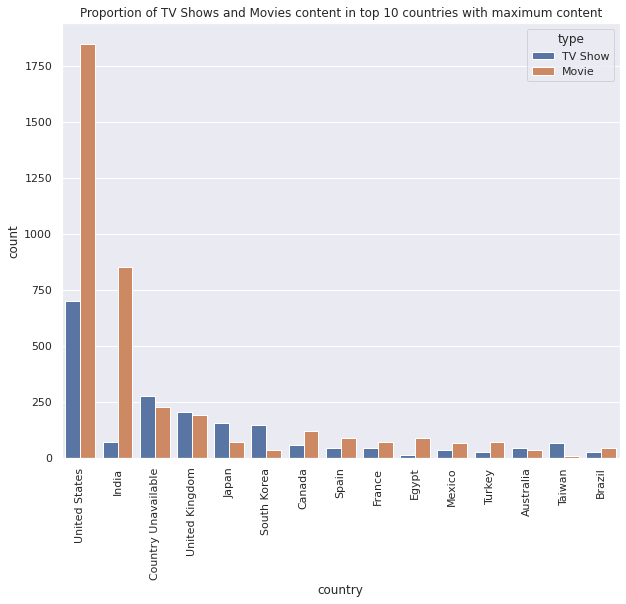

In [ ]:
#Proportion of TV Shows and Movies content in top 10 countries with maximum content
sns.set()
plt.figure(figsize=(10,8))
ax=sns.countplot(x="country",data= netflix_df,hue= "type",order = netflix_df['country'].value_counts().index[0:15])
plt.xticks(rotation=90)
plt.title("Proportion of TV Shows and Movies content in top 10 countries with maximum content")
plt.show()

Most content on Netflix is from United States followed by India and United Kingdom. Netflix has a little over 90% of its total Content from top 12 countries, countries are namely, United States, India, United Kingdom, Canada, France, Japan, Spain, South Korea, Germany, Mexico, China and Australia.

Netflix has a lot of Japanese and South Korean TV Shows than the countries' movies and opposite in case of India.



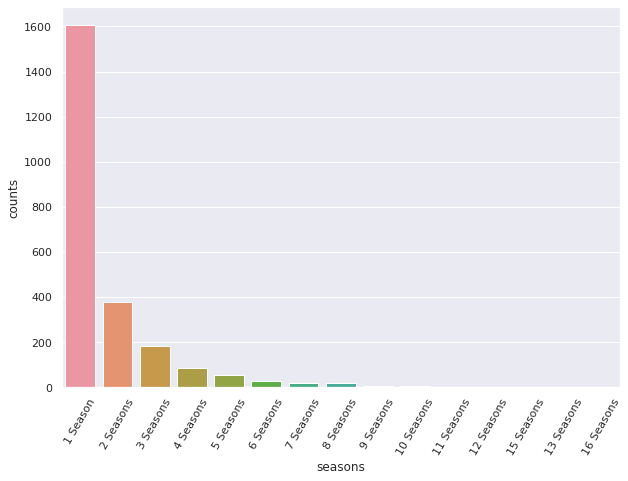

In [ ]:
plt.figure(figsize = (10,7))


seasons_df = pd.DataFrame(TVshows_df['duration'].value_counts()).reset_index()
seasons_df.rename(columns = {'index': 'seasons', 'duration': 'counts'}, inplace = True)
sns.barplot(data =seasons_df, x= 'seasons', y= 'counts')
plt.xticks(rotation = 60)
plt.show()


###Majority of the TVshows have only one season

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


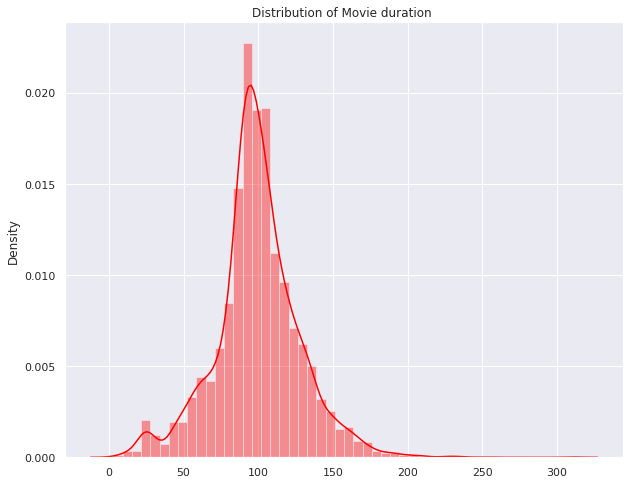

In [ ]:
# Plotting a distplot for the movie duration
plt.figure(figsize = (10,8))
ax = plt.gca()
sns.distplot( x= Movie_df['duration'], ax = ax, color = '#ff0000')
plt.title('Distribution of Movie duration ')
plt.show()

###Also Most of the movies are of length ~90 mins

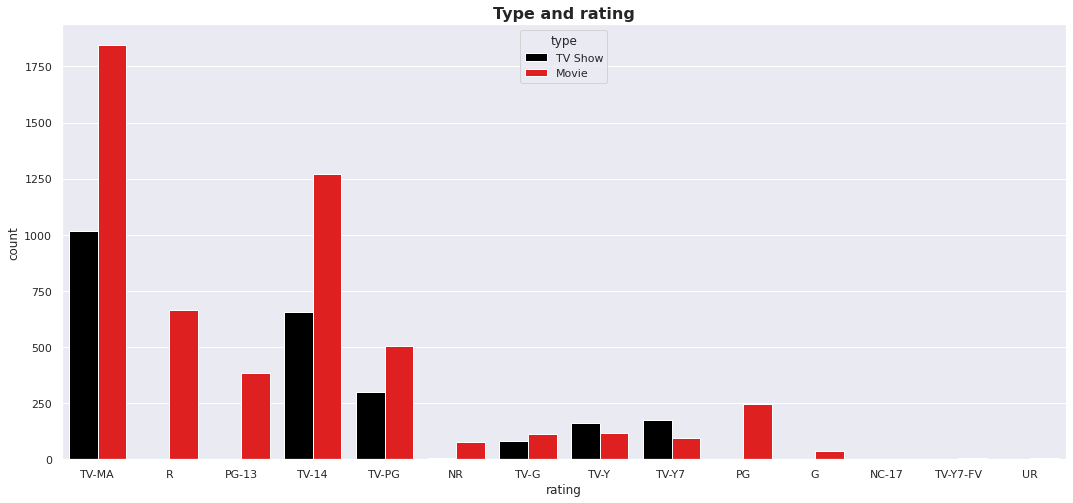

In [ ]:
# Plottinga barplot for each of the ratings
plt.figure(figsize=(18,8))
sns.countplot(x='rating',hue='type',data=netflix_df,palette=["#000000","#ff0000"])
plt.title('Type and rating',size='16',fontweight="bold")
plt.show()

###Most content of Netflix is rated for mature audience only

In [ ]:
#Defining a function to find appropriate for the type of audience
def APPROPRIATE_FOR_WHOM (rating):
  appropriate_For = ''
  if (rating== 'TV-MA' or rating== 'NR' or rating=='NC-17' or rating=='UR'):
    appropriate_For= 'Adults Only'
  elif (rating== 'R' or rating== 'PG-13' or rating== 'TV-14'):
    appropriate_For= 'Teenage'
  elif (rating=='TV-Y7' or rating=='TV-Y7-FV' or rating== 'PG' or rating== 'TV-PG'):
    appropriate_For= 'Kid_7_to_13'
  else:
    appropriate_For= 'Kids'

  return appropriate_For

In [ ]:
#Creating new column 'appropriate_For'
netflix_df['appropriate_For'] = netflix_df.apply(lambda x: APPROPRIATE_FOR_WHOM(x['rating']), axis=1)
netflix_df.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,month_added,year_added,appropriate_For
0,s1,TV Show,3%,No Director,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,August,2020,Adults Only
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,December,2016,Adults Only
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",December,2018,Teenage
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",November,2017,Teenage
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,January,2020,Teenage


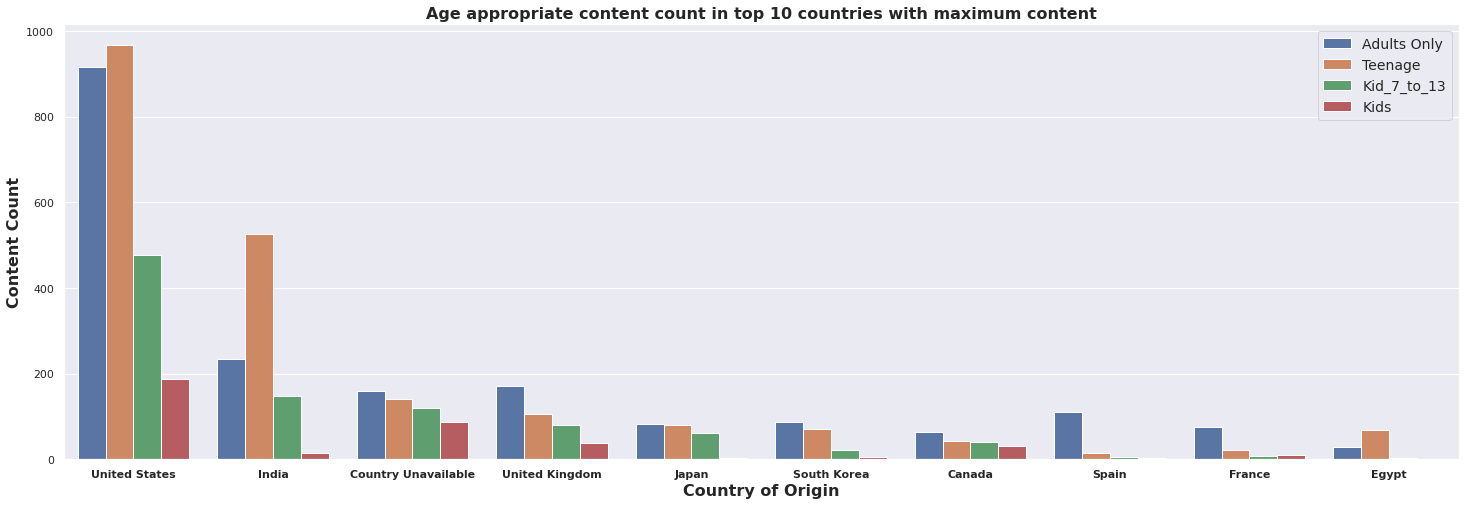

In [ ]:
# Plotting a barplot for the type of content created from each country
sns.set()
plt.figure(figsize=(25,8))
ax=sns.countplot(x="country",data= netflix_df,hue= "appropriate_For",order = netflix_df['country'].value_counts().index[0:10])
plt.xticks(weight='bold')
plt.xlabel('Country of Origin', weight='bold', fontsize=16)
plt.ylabel('Content Count', weight='bold', fontsize=16)
plt.title("Age appropriate content count in top 10 countries with maximum content", weight='bold', fontsize=16)
plt.legend(loc='upper right', fontsize=14)
plt.show()

###As you can see other than India, every other countries do contents for mostly mature audience

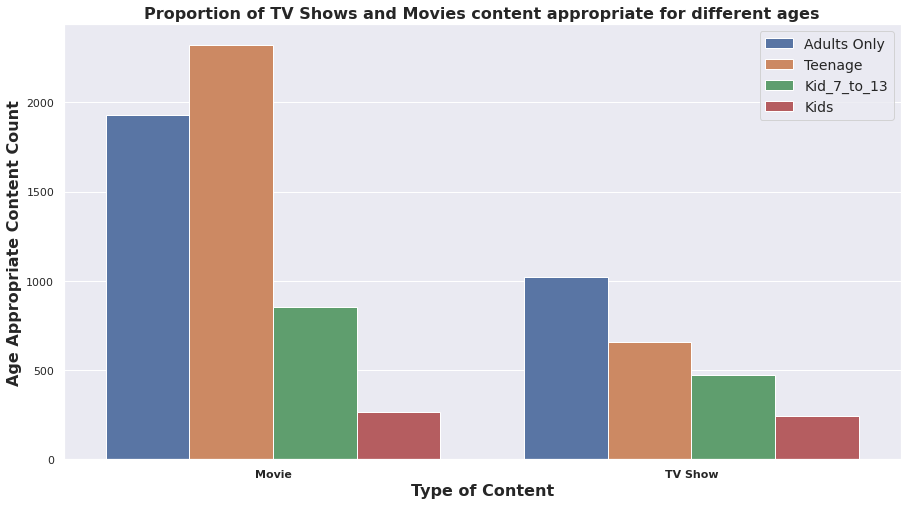

In [ ]:
# Plotting a barplot for the proportion of TVshows and movies for each different age
sns.set()
plt.figure(figsize=(15,8))
ax=sns.countplot(x="type",data= netflix_df,hue= "appropriate_For",order = netflix_df['type'].value_counts().index[0:15])
plt.xticks(weight='bold')
plt.xlabel('Type of Content', weight='bold', fontsize=16)
plt.ylabel('Age Appropriate Content Count', weight='bold', fontsize=16)
plt.title("Proportion of TV Shows and Movies content appropriate for different ages", weight='bold', fontsize=16)
plt.legend(loc='upper right', fontsize=14)
plt.show()

### Majority of the movies are made for Teenage where as it is for Adults in the case of TVshows

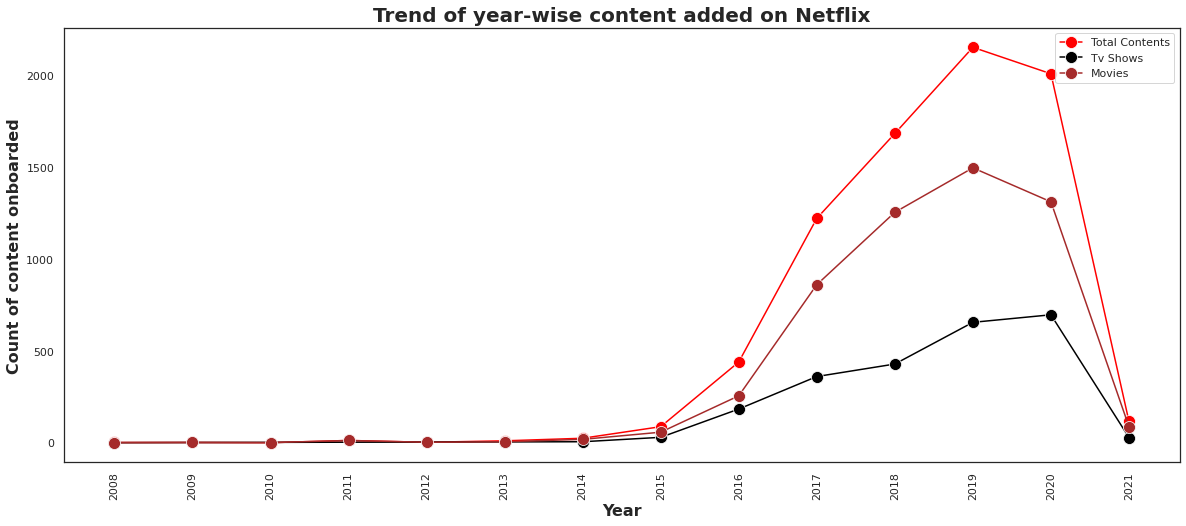

In [ ]:
#Trend of year-wise content added on Netflix
sns.set_style("white")
#sns.set()
plt.figure(figsize=(20,8))
data1 = netflix_df.groupby(['year_added'])['show_id'].count().reset_index(name='total_count')
data2= netflix_df[netflix_df['type']=='TV Show']
data2= data2.groupby('year_added')['show_id'].count().reset_index(name='TV_count')
data3= netflix_df[netflix_df['type']=='Movie']
data3= data3.groupby('year_added')['show_id'].count().reset_index(name='Movie_count')

#Plotting three different line plots 
plot1= sns.lineplot(x=data1['year_added'],y=data1['total_count'],data=data1, color= 'Red', marker= 'o', markersize= 12)
plot2= sns.lineplot(x=data2['year_added'], y=data2['TV_count'], data=data2, color= 'Black', marker= 'o', markersize= 12)
plot3= sns.lineplot(x=data3['year_added'], y=data3['Movie_count'], data=data3, color= 'Brown', marker= 'o', markersize= 12)

#Plotting multiple lineplots to observe the trend
plt.xlabel('Year', weight='bold', fontsize=16)
plt.ylabel('Count of content onboarded', weight='bold', fontsize=16)
plt.title("Trend of year-wise content added on Netflix", weight='bold', fontsize=20)
plt.xticks(data1['year_added'].unique())
plt.xticks(rotation='vertical')
label=['Total Contents','Tv Shows','Movies']
plt.legend(label)
plt.show()

###From the line plot,we can easily say that the contents onboarding has been increasing from 2015

In [ ]:
# month wise content distribution
month_list = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September','October', 'November', 'December']



# month wise content distribution in entire dataset
month_added_df = pd.DataFrame(netflix_df['month_added'].value_counts()).reset_index().sort_values('index')
month_added_df.rename(columns = {'index' : 'month_added', 'month_added': 'count_added'}, inplace = True)
month_added_df["month_added"]  = pd.Categorical(month_added_df["month_added"], categories=month_list)

# month wise content distribution in movies dataset
movies_added_month =  pd.DataFrame(Movies_df['month_added'].value_counts()).reset_index().sort_values('index')
movies_added_month.rename(columns = {'index' : 'month_added', 'month_added': 'count_added'}, inplace = True)
movies_added_month["month_added"]  = pd.Categorical(movies_added_month["month_added"], categories=month_list)

# month wise content distribution in TV shows dataset
shows_added_month =  pd.DataFrame(TVshows_df['month_added'].value_counts()).reset_index().sort_values('index')
shows_added_month.rename(columns = {'index' : 'month_added', 'month_added': 'count_added'}, inplace = True)
shows_added_month["month_added"]  = pd.Categorical(shows_added_month["month_added"], categories=month_list)





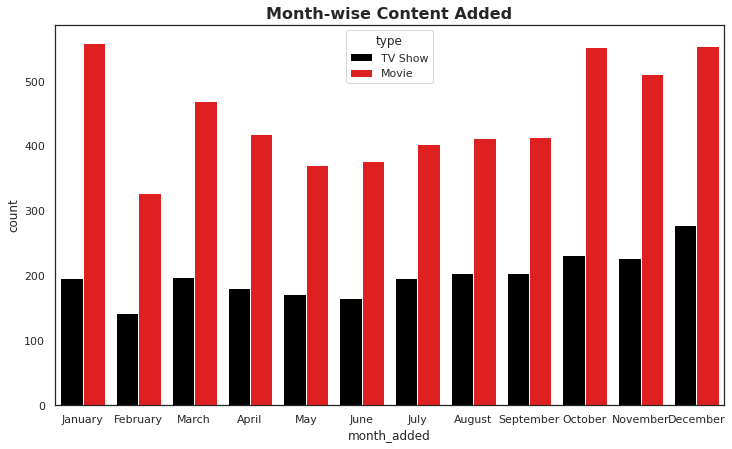

In [ ]:
# plotting the results of movies and TV shows in  count plot
plt.figure(figsize = (12,7))
sns.countplot(data =netflix_df , x = 'month_added', order = month_list,  hue = 'type',palette=["#000000","#ff0000"])
plt.title('Month-wise Content Added',size='16',fontweight="bold")
plt.show()

###From the bar plot,most of the contents are uploaded in October and December

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Content Description boxplot')

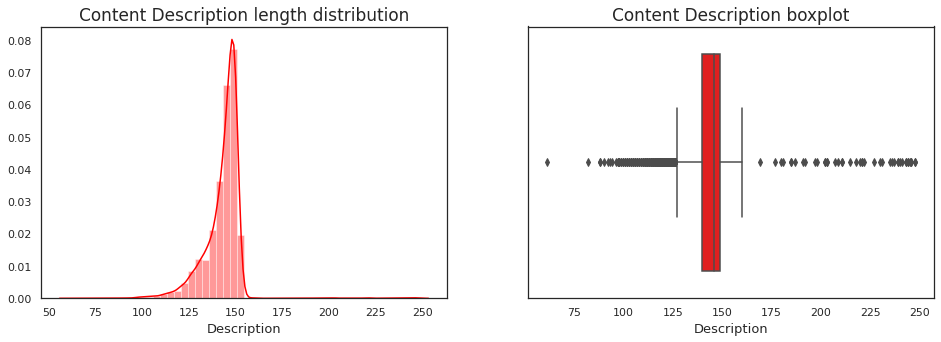

In [ ]:
# Get the length of the description feature
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)  # It says plotting 2 graphs in 1 row
sns.distplot(netflix_df['description'].apply(lambda x: len(x)), color='red') # Get distplot for description length
plt.ylabel('',fontsize=13)
plt.xlabel('Description',fontsize=13)
plt.title('Content Description length distribution',fontsize=17)

plt.subplot(1,2,2)
sns.boxplot(netflix_df['description'].apply(lambda x: len(x)), color='red') # Get boxplot for description length
plt.ylabel('',fontsize=13)
plt.xlabel('Description',fontsize=13)
plt.title('Content Description boxplot',fontsize=17)

###From the distplot and boxplot, we can easing interpret that the Average content description length lies around 140 words

In [ ]:
import nltk
nltk.download('stopwords')
import string
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Function to remove punctuations and stop words from the message
def text_process(msg):
    nopunc =[char for char in msg if char not in string.punctuation]  # to remove punctuations
    nopunc=''.join(nopunc)
    return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')]) # to remove stopwords

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
# Get tokenized description by applying text_process function on description feature
netflix_df['tokenized_description'] = netflix_df['description'].apply(text_process)

In [ ]:
# check out some entry from description (This is before tokentization)
netflix_df['description'][1]

'After a devastating earthquake hits Mexico City, trapped survivors from all walks of life wait to be rescued while trying desperately to stay alive.'

In [ ]:
# check out same entry from tokenized_description (This is after tokentization)
netflix_df['tokenized_description'][25]

'reallife look FBI counterterrorism operations features access sides sting government informant radicalized target'

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
""" We will be using tf-idf vectorizer which converts txt to vectors, tf : term frequency , idf : inverse document frequency 
(It is arguably better than count vectorizer in many cases,# set parameters for tfidfvectorizer"""
vectorizer = TfidfVectorizer(min_df = 5,
                              max_df = 0.95,
                              max_features = 3000, lowercase=True,
                              stop_words = 'english')

In [ ]:
# Define helper functions to get top words
def get_top_n_words(n_top_words, vectorizer, text_data):
    '''
    returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample
    '''
    vectorized_headlines = vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_headlines, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii').decode('utf-8') for 
             word in vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

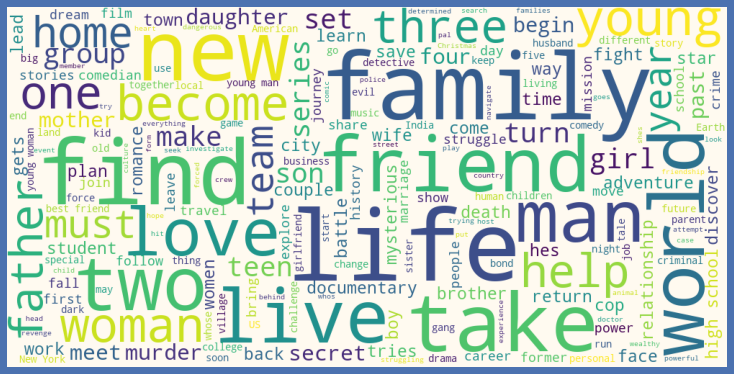

In [ ]:
from wordcloud import WordCloud
# Plot wordcloud for tokenized description
text = netflix_df['tokenized_description']
wordcloud = WordCloud(width = 1000,height = 500,background_color = 'floralwhite').generate(" ".join(text))
fig = plt.figure(figsize = (10, 5),facecolor = 'b',edgecolor = 'k',)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

###From the wordcloud, it is evident that the most frequent words are Life and Family

##**Outlier Detection**

In [ ]:
# cheking for the percent distribution in duraion column of shows_df
TVshows_df['duration'].value_counts(normalize =True)*100
shows_duration = pd.DataFrame(TVshows_df['duration'].value_counts()).reset_index().rename(columns = {'index' : 'No. of Seasons', 'duration': 'No. of Shows'})
shows_duration['Percentage'] = shows_duration['No. of Shows']/len(TVshows_df)*100
shows_duration

,No. of Seasons,No. of Shows,Percentage
0,1 Season,1606,66.972477
1,2 Seasons,378,15.763136
2,3 Seasons,183,7.631359
3,4 Seasons,86,3.586322
4,5 Seasons,57,2.376981
5,6 Seasons,30,1.251043
6,7 Seasons,19,0.792327
7,8 Seasons,18,0.750626
8,9 Seasons,8,0.333611
9,10 Seasons,5,0.208507


In [ ]:
#Shape of the TV_shows_df
TVshows_df.shape

(2398, 13)

In [ ]:
#Dropping the tvshows that have more than 8 seasons
TVshows_df = TVshows_df[TVshows_df['duration'] != '9 Seasons']
TVshows_df = TVshows_df[TVshows_df['duration'] != '10 Seasons']
TVshows_df = TVshows_df[TVshows_df['duration'] != '11 Seasons']
TVshows_df = TVshows_df[TVshows_df['duration'] != '12 Seasons']
TVshows_df = TVshows_df[TVshows_df['duration'] != '13 Seasons']
TVshows_df = TVshows_df[TVshows_df['duration'] != '14 Seasons']
TVshows_df = TVshows_df[TVshows_df['duration'] != '15 Seasons']
TVshows_df = TVshows_df[TVshows_df['duration'] != '16 Seasons']
TVshows_df['duration'].value_counts(normalize =True)*100

1 Season     67.564156
2 Seasons    15.902398
3 Seasons     7.698780
4 Seasons     3.618006
5 Seasons     2.397981
6 Seasons     1.262095
7 Seasons     0.799327
8 Seasons     0.757257
Name: duration, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


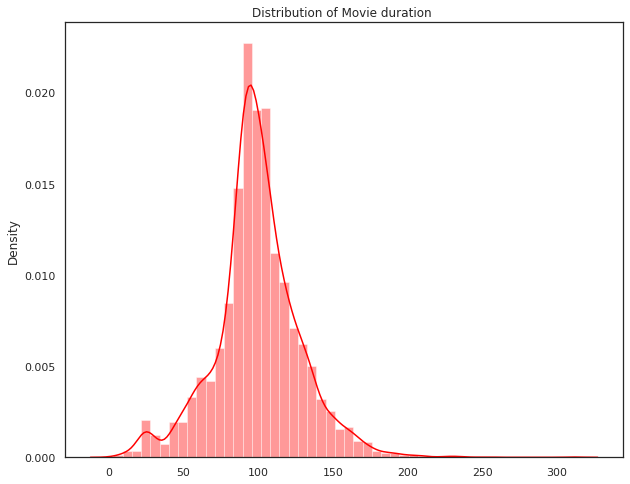

In [ ]:
#Plotting a distplot for movie duration distribution
plt.figure(figsize = (10,8))
ax = plt.gca()
sns.distplot( x= Movie_df['duration'], ax = ax, color = '#ff0000')
plt.title('Distribution of Movie duration ')
plt.show()

In [ ]:
#Changing the data to integer type
Movie_df['duration']=Movie_df['duration'].astype(int)  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
#Defining a max quantile range for movie duration 
max_threshold= Movie_df['duration'].quantile(0.95)
max_threshold

148.0

In [ ]:
##Defining a min quantile range for movie duration 
in_threshold= Movie_df['duration'].quantile(0.05)
min_threshold

52.0

In [ ]:
Movies_df=Movie_df[(Movie_df['duration']<max_threshold)&(Movie_df['duration']>min_threshold)]
Movies_df

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,month_added,year_added
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,December,2016
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",December,2018
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",November,2017
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123,Dramas,A brilliant group of students become card-coun...,January,2020
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,2019,TV-MA,95,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",June,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7780,s7781,Movie,Zoo,Shlok Sharma,"Shashank Arora, Shweta Tripathi, Rahul Kumar, ...",India,2018,TV-MA,94,"Dramas, Independent Movies, International Movies",A drug dealer starts having doubts about his t...,July,2018
7781,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2006,PG,88,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",January,2020
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2005,TV-MA,99,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,October,2020
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2015,TV-14,111,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,March,2019


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


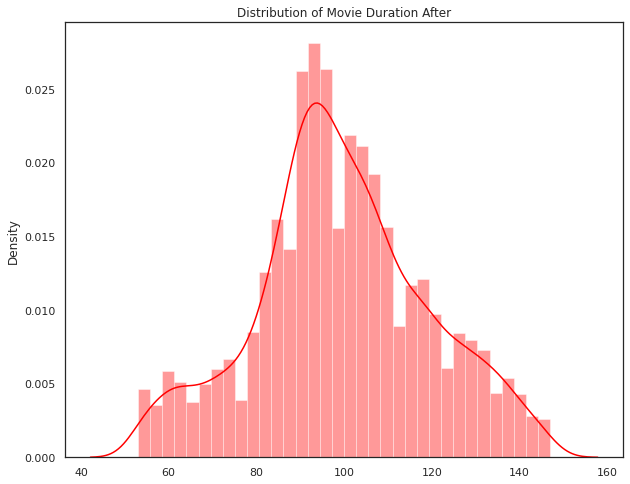

In [ ]:
#plotting a distplot for movie duration after outlier detection
plt.figure(figsize = (10,8))
ax = plt.gca()
sns.distplot( x= Movies_df['duration'], ax = ax, color = '#ff0000')
plt.title('Distribution of Movie Duration After')
plt.show()

##**Data Preprocesing**

In [ ]:
 # consolidating dataset and removing unnecessary features
updated_df = pd.concat([TVshows_df, Movies_df], axis = 0).reset_index().drop('index', axis = 1)
clustered_df = pd.DataFrame(updated_df['listed_in'] + updated_df['description'])
clustered_df.rename(columns = {0 : 'description'}, inplace = True)

In [ ]:
def removing_punctuations(text):
        
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [ ]:
clustered_df['description'] = clustered_df['description'].apply(removing_punctuations)
clustered_df

,description
0,International TV Shows TV Dramas TV SciFi Fan...
1,International TV Shows TV Dramas TV MysteriesA...
2,Crime TV Shows International TV Shows TV Drama...
3,Crime TV Shows Docuseries International TV Sho...
4,International TV Shows TV DramasAs a psycholog...
...,...
7184,Dramas Independent Movies International Movies...
7185,Children Family Movies ComediesDragged from c...
7186,Dramas International MoviesWhen Lebanons Civil...
7187,Dramas International Movies Music MusicalsA s...


In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
from nltk.stem import WordNetLemmatizer

# create an object of stemming function
lemmatizer = WordNetLemmatizer()

def stem_func(text):    
    '''a function which stems each word in the given text'''
    text = [lemmatizer.lemmatize(word) for word in text.split()]
    return " ".join(text)

In [ ]:
clustered_df['description'] = clustered_df['description'].apply(stem_func)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer as Tfidf

tfidf_cluster =  Tfidf(stop_words = 'english', max_features = 2000)
clustered_tfidf = tfidf_cluster.fit_transform(clustered_df['description'])
tfidf_cluster.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['10',
 '10yearold',
 '11yearold',
 '12',
 '1950s',
 '1960s',
 '1970s',
 '1980s',
 '1990s',
 '19thcentury',
 '20',
 '30',
 '40',
 '50',
 '60',
 'abandoned',
 'abducted',
 'ability',
 'aboard',
 'abuse',
 'abusive',
 'academy',
 'accepts',
 'access',
 'accident',
 'accidentally',
 'account',
 'accused',
 'act',
 'acting',
 'action',
 'activist',
 'actor',
 'actress',
 'adaptation',
 'addiction',
 'adorable',
 'adult',
 'adulthood',
 'adventure',
 'adventurea',
 'adventureafter',
 'adventurewhen',
 'adventurous',
 'affair',
 'affection',
 'afghanistan',
 'afloat',
 'africa',
 'african',
 'aftermath',
 'age',
 'agency',
 'agent',
 'aging',
 'ago',
 'agrees',
 'aid',
 'aim',
 'air',
 'alex',
 'alien',
 'alive',
 'alliance',
 'ally',
 'amateur',
 'amazing',
 'ambition',
 'ambitious',
 'america',
 'american',
 'americas',
 'amid',
 'ancient',
 'angeles',
 'animal',
 'animated',
 'anime',
 'anniversary',
 'answer',
 'anthology',
 'antic',
 'apart',
 'apartment',
 'app',
 'appears',
 'approach

In [ ]:
clustered_tfidf.shape

(7189, 2000)

In [ ]:
# convert X into array form for clustering
X = clustered_tfidf.toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
from sklearn.decomposition import PCA

#Perform a PCA to visualize clusters
pca = PCA(n_components = 2)
visualize_df =pd.DataFrame(pca.fit_transform(X))
visualize_df.head()

,0,1
0,0.255435,-0.029084
1,0.261728,-0.037340
2,0.376200,-0.020716
3,0.223857,0.038666
4,0.175207,-0.029101


##**Applying the Clustering Model**

###**K-Means Clustering**

###k-means clustering is a method of vector quantization, originally from signal processing, that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster

Initialization complete
Iteration 0, inertia 14157.1632971394.
Iteration 1, inertia 7020.7355699181535.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 13777.103432761302.
Iteration 1, inertia 7020.7355699181535.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 13270.049520779763.
Iteration 1, inertia 7020.7355699181535.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 13702.76052227154.
Iteration 1, inertia 7020.7355699181535.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 13665.368324098128.
Iteration 1, inertia 7020.7355699181535.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 13464.171381892844
Iteration 1, inertia 6968.4743532192115
Iteration 2, inertia 6900.345140037916
Iteration 3, inertia 6872.845647051814
Iteration 4, inertia 6871.416841610975
Iteration 5, inertia 6

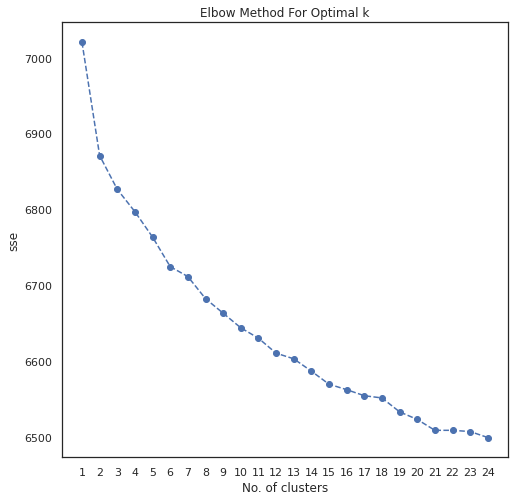

In [ ]:
from sklearn.cluster import KMeans

# Elbow curve to find optimal K
sse = []
K = range(1,25)
for num_clusters in list(K):
    k_model = KMeans(n_clusters=num_clusters, init = 'k-means++', n_init = 5, random_state= 51, verbose = 1)
    y_kmeans = k_model.fit_predict(X)
    sse.append(k_model.inertia_)

plt.figure(figsize = (8,8))    
plt.plot(K, sse, 'bo--')
plt.xticks(list(range(1,25)))
plt.xlabel('No. of clusters')
plt.ylabel('sse')
plt.title('Elbow Method For Optimal k')
plt.show()

###**Silhouette Score**

###Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1. 1: Means clusters are well apart from each other and clearly distinguished

In [ ]:
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

# calculating silhoutte score for all clusters
sill = [] # sillhoute score
for i in range(2,25):
    model = KMeans(n_clusters=i,init ='k-means++',random_state=51)
    model.fit(X)
    y_pred = model.predict(X)
    score = silhouette_score(X,y_pred)
    sill.append(score)
    print('cluster: %d \t Sillhoute: %0.4f'%(i,score))

cluster: 2 	 Sillhoute: 0.0151
cluster: 3 	 Sillhoute: 0.0178
cluster: 4 	 Sillhoute: 0.0189
cluster: 5 	 Sillhoute: 0.0179
cluster: 6 	 Sillhoute: 0.0202
cluster: 7 	 Sillhoute: 0.0208
cluster: 8 	 Sillhoute: 0.0205
cluster: 9 	 Sillhoute: 0.0196
cluster: 10 	 Sillhoute: 0.0194
cluster: 11 	 Sillhoute: 0.0122
cluster: 12 	 Sillhoute: 0.0205
cluster: 13 	 Sillhoute: 0.0122
cluster: 14 	 Sillhoute: 0.0138
cluster: 15 	 Sillhoute: 0.0142
cluster: 16 	 Sillhoute: 0.0185
cluster: 17 	 Sillhoute: 0.0157
cluster: 18 	 Sillhoute: 0.0141
cluster: 19 	 Sillhoute: 0.0182
cluster: 20 	 Sillhoute: 0.0148
cluster: 21 	 Sillhoute: 0.0135
cluster: 22 	 Sillhoute: 0.0133
cluster: 23 	 Sillhoute: 0.0123
cluster: 24 	 Sillhoute: 0.0125


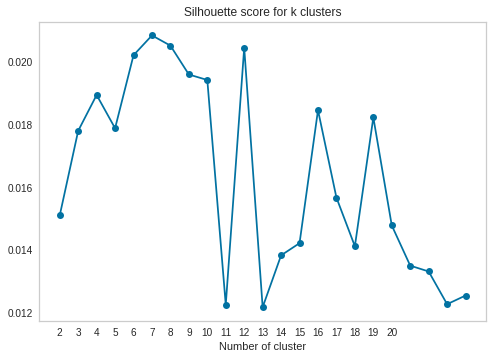

In [ ]:
#Plotting Sillhoute's score
plt.plot(sill,'bo-')
plt.xticks(list(range(0,19)),list(range(2,21)))
plt.grid(),plt.xlabel('Number of cluster')
plt.title('Silhouette score for k clusters')
plt.show()

In [ ]:
from sklearn.cluster import KMeans

# creating and applying a kmeans with K=6
km_model = KMeans(n_clusters=6,init ='k-means++',random_state=51)
km_model.fit(X)
y_preds = km_model.predict(X)
score = silhouette_score(X,y_preds)
print('cluster: %d \t Sillhoute: %0.4f'%(5,score))

cluster: 5 	 Sillhoute: 0.0202


No handles with labels found to put in legend.


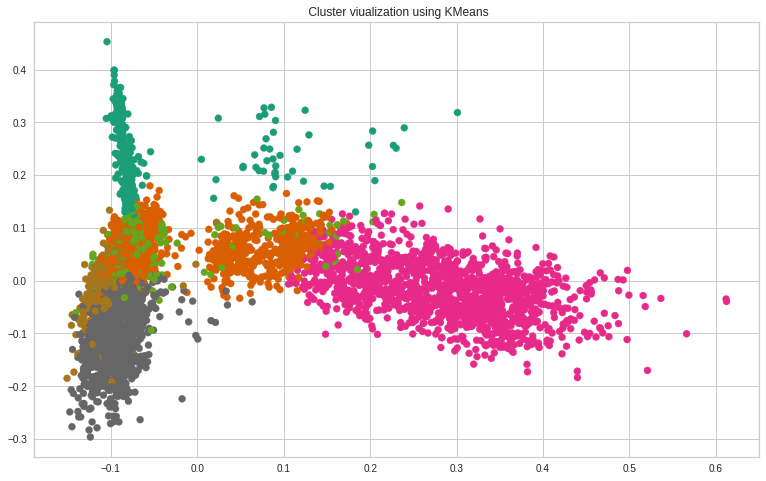

In [ ]:
# visualizing the results of kmeans in two dimension
plt.figure(figsize=(13,8))
plt.scatter(visualize_df[0], visualize_df[1], c=y_preds, cmap = 'Dark2')
plt.title(' Cluster viualization using KMeans')
plt.legend()
plt.show()

In [ ]:
# adding a feaute in the updated_dataset having cluster names
updated_df['cluster'] = km_model.labels_

In [ ]:
# checking the head of the dataset
updated_df

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,month_added,year_added,cluster
0,s1,TV Show,3%,No Director,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,August,2020,2
1,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,July,2017,2
2,s12,TV Show,1983,No Director,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States",2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law...",November,2018,2
3,s13,TV Show,1994,Diego Enrique Osorno,No Cast,Mexico,2019,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...,May,2019,2
4,s17,TV Show,Feb-09,No Director,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",Country Unavailable,2018,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h...",March,2019,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7184,s7781,Movie,Zoo,Shlok Sharma,"Shashank Arora, Shweta Tripathi, Rahul Kumar, ...",India,2018,TV-MA,94,"Dramas, Independent Movies, International Movies",A drug dealer starts having doubts about his t...,July,2018,5
7185,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2006,PG,88,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",January,2020,4
7186,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2005,TV-MA,99,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,October,2020,5
7187,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2015,TV-14,111,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,March,2019,5


###**Dendrogram**

###A dendrogram is a diagram representing a tree. This diagrammatic representation is frequently used in different contexts: in hierarchical clustering, it illustrates the arrangement of the clusters produced by the corresponding analyses.

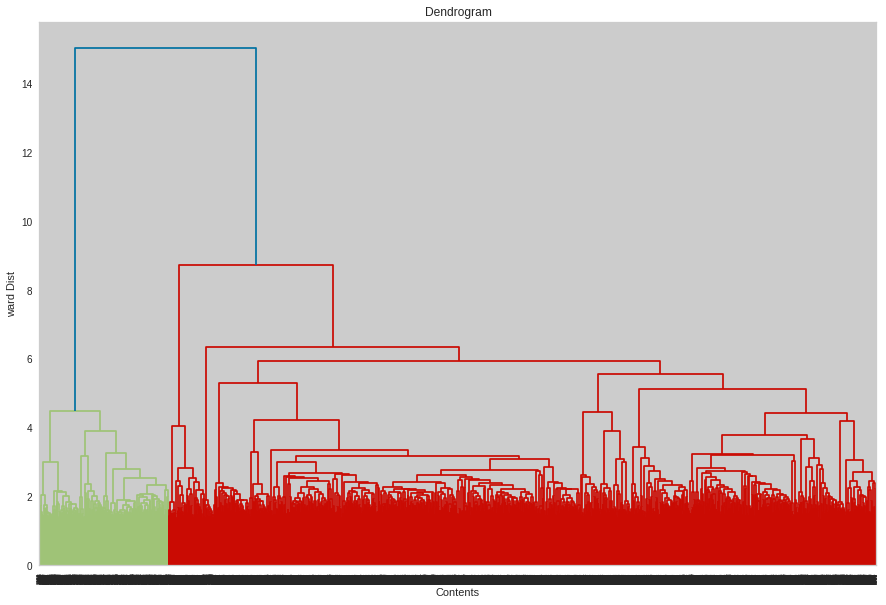

In [ ]:
# Using the dendogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(15,10))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Contents')
plt.ylabel('ward Dist')
plt.show() 

###**Hierarchial Clustering**

###Hierarchical clustering, also known as hierarchical cluster analysis, is an algorithm that groups similar objects into groups called clusters. The endpoint is a set of clusters, where each cluster is distinct from each other cluster, and the objects within each cluster are broadly similar to each other.

In [ ]:
# Fitting hierarchical clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
# X =X.values
hc = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

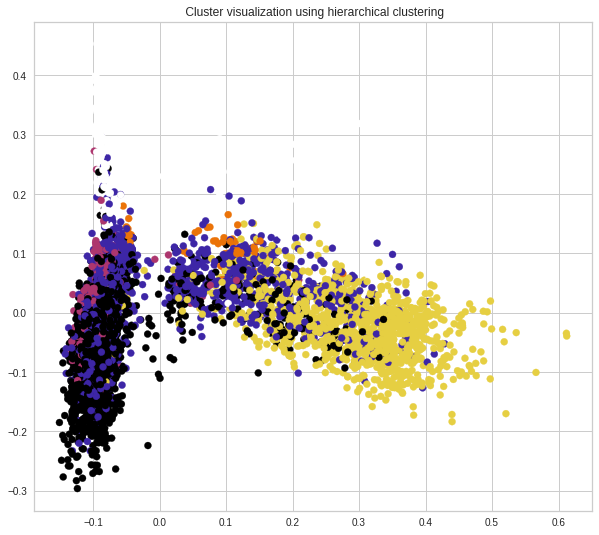

In [ ]:
plt.figure(figsize = (10,9))
plt.scatter(visualize_df[0], visualize_df[1], c=y_hc, cmap = 'CMRmap')
plt.title(' Cluster visualization using hierarchical clustering')
plt.show()

## **Conclusion**

###**I. Insights from EDA**

### 1.Movies and TV Shows on Netflix are in ratio 7/3. And TV Shows have long way to catch upto the number of Movies.
###2.Most content on Netflix is from United States followed by India and United Kingdom. Netflix has a little over 90% of its total Content from top 12 countries, countries are namely, United States, India, United Kingdom, Canada, France, Japan, Spain, South Korea, Germany, Mexico, Chinaand Australia.
###3Netflix has a lot of Japanese and South Korean TV Shows than the countries' movies and opposite in case of India.
###4.Majority of the TVshows have only one season and Also Most of the movies are of length ~90 mins
###5.Most content of Netflix is rated for mature audience only and majority of the movies are made for Teenage where as it is for Adults in the case of TVshows
###6.The average content description is around 140 words and the most used frequent words are life and Family

###**ll.Insights from Clustering**

###1.We found that the optimal no. of clusters using the elbow method for our processed dataset to be **6** which was validated using the sillhouette score method.
###2.We ave also build a Hierrachial Clustering model with the same no.of clusters which was verified using a dendrogram